# Statistical_Analysis

In [1]:
section_fig_main_title = 'Statistical_Analysis_'

In [2]:
!which python

/Users/amin/miniconda3/bin/python


In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
import sys
print(sys.executable)


/Users/amin/anaconda3/bin/python


In [5]:
import os, sys
import requests
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from urllib.parse import urljoin, urlparse
# from bs4 import BeautifulSoup as bs
import re
import statsmodels.api as sm
import pingouin as pg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pandas.plotting import lag_plot
import researchpy as rp
from tensorflow import keras

from sklearn.metrics import r2_score
from math import sqrt
import json

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
# !/Users/amin/Desktop/proj/env/bin/python -m pip install xgboost

from sklearn.metrics import r2_score,mean_absolute_error

# !/Users/amin/anaconda3/bin/python -m pip install biokit.viz 
# pip install --upgrade tensorflow 



from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
# from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD

import math
from sklearn.metrics import mean_squared_error


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from pandas.plotting import autocorrelation_plot
import gif

Using TensorFlow backend.


In [6]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

import tensorflow as tf
print(tf.__version__)

import gif
from tqdm import tqdm

from sklearn import metrics
# import statsmoadels.api as sm

1.13.1


## Read Data 



In [7]:
csv_path = "../Data/Data_ICME_Edited_out_P02_02.csv"
df = pd.read_csv(csv_path, infer_datetime_format=True)


df['ICME Plasma/Field Start Y/M/D (UT) (b)'] = pd.to_datetime(df['ICME Plasma/Field Start Y/M/D (UT) (b)'])
df['ICME Plasma/Field End Y/M/D (UT) (b)'] = pd.to_datetime(df['ICME Plasma/Field End Y/M/D (UT) (b)'])


df.index = df['ICME Plasma/Field Start Y/M/D (UT) (b)']
df = df.drop(columns=['ICME Plasma/Field Start Y/M/D (UT) (b)'])
df = df.drop(columns=['ICME Plasma/Field End Y/M/D (UT) (b)'])

In [8]:
df.columns

Index(['Disturbance Y/M/D (UT) (a)',
       'Comp. Start (Hrs wrt. Plasma/ Field) (c)',
       'Comp. End (Hrs wrt. Plasma/ Field) (c)',
       'MC Start (Hrs wrt. Plasma/ Field) (d)',
       'End (Hrs wrt. Plasma/ Field) (d)', 'BDE? (e)', 'BIF? (f)', 'Qual. (g)',
       'dV (km/s) (h)', 'V_ICME (km/s) (i)', 'V_max (km/s) (j)', 'B (nT) (k)',
       'MC? (l)', 'Dst (nT) (m)', 'V_transit (km/s) (n)',
       'LASCO CME Y/M/D (UT) (o)'],
      dtype='object')

In [9]:
# https://stackabuse.com/python-check-if-string-contains-substring/
emp_list= []
for i in df['dV (km/s) (h)']:
    
    fullstring = i
    substring = "S"

    if fullstring.find(substring) != -1:
#         print("Found!")
        emp_list.append('Yes')
    else:
#         print("Not found!")
        emp_list.append('No')
    
df['forward fast shock happens'] = emp_list

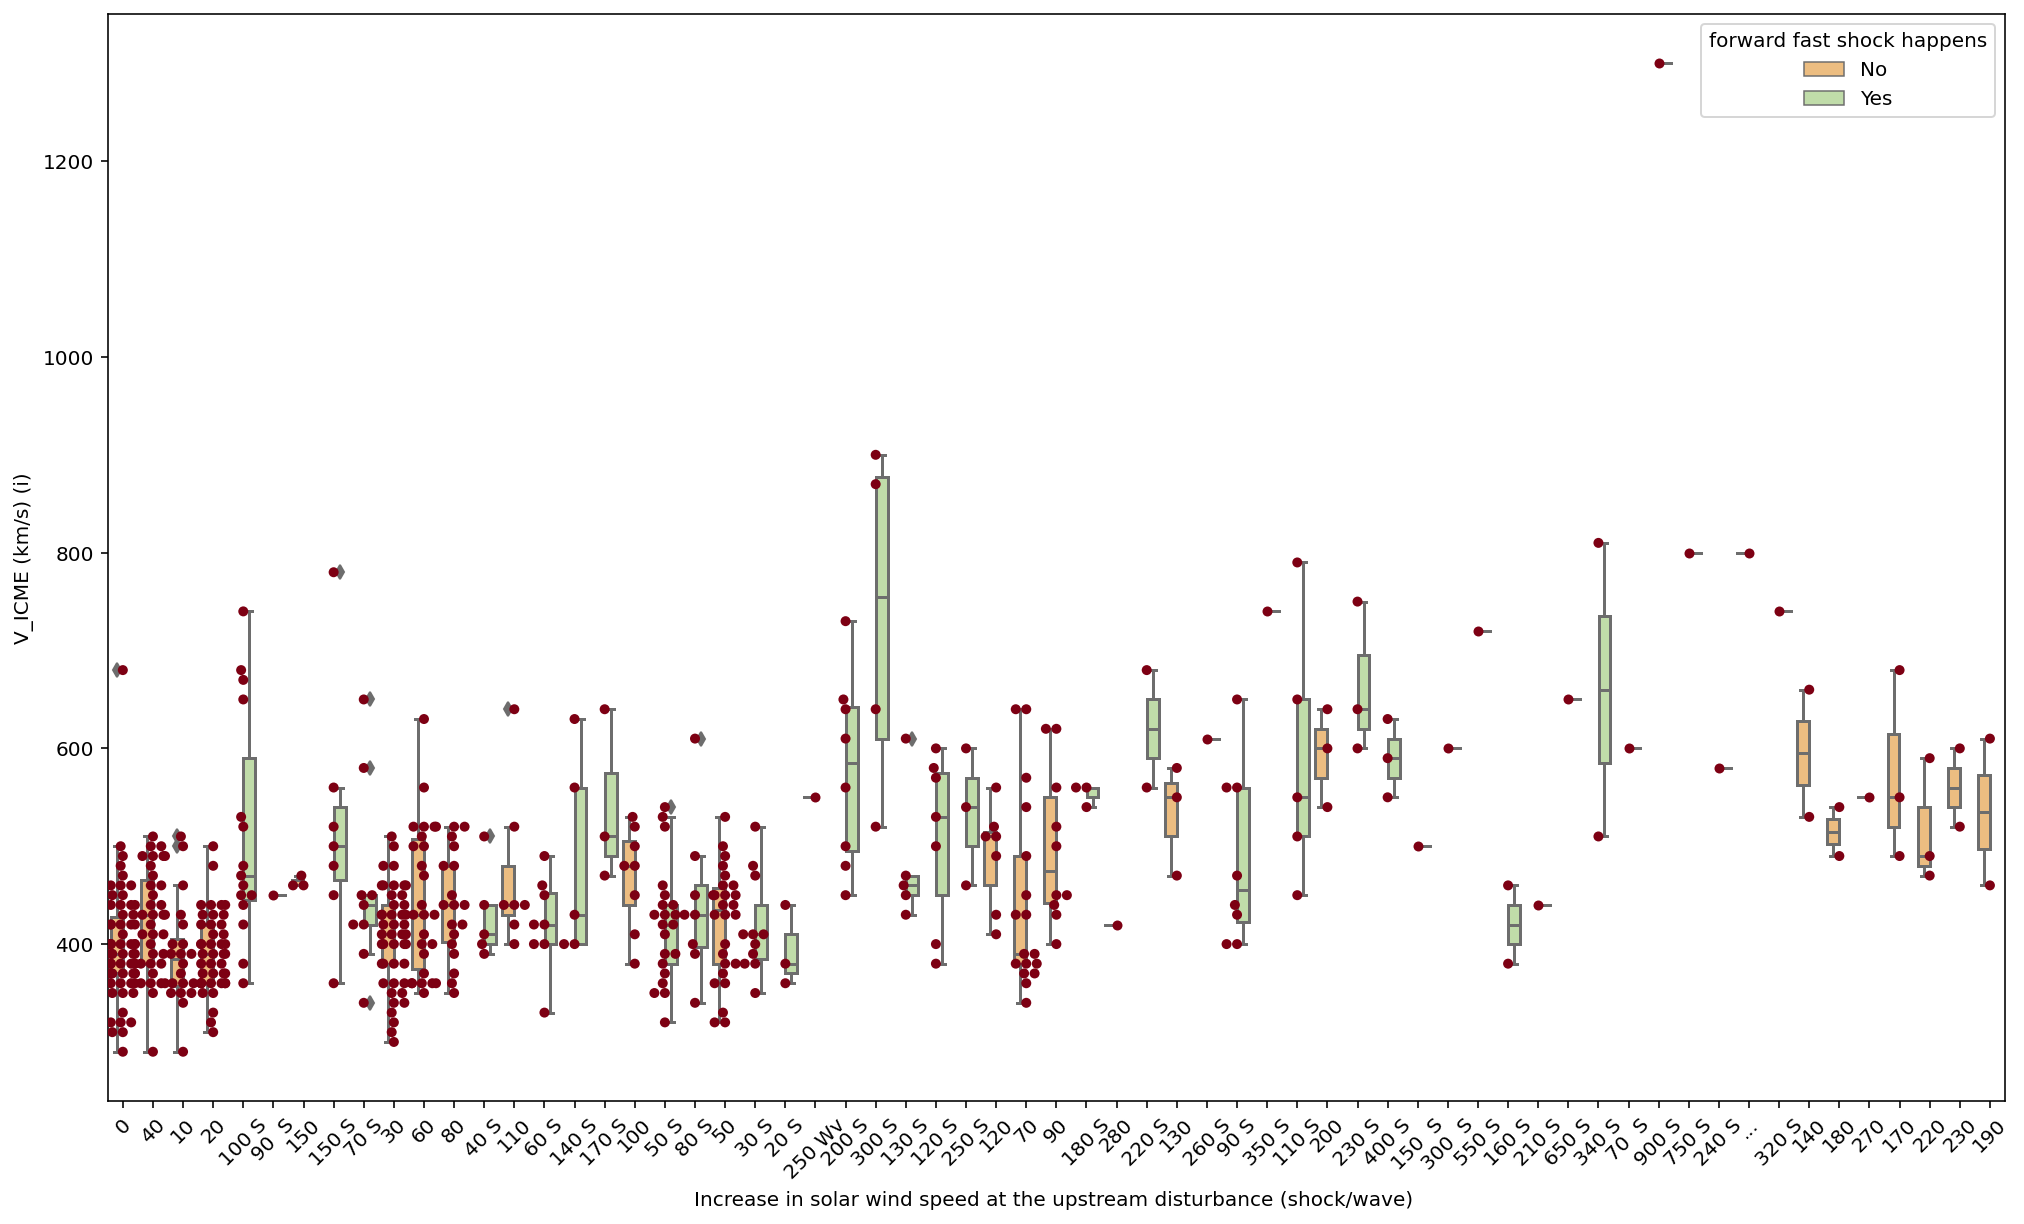

In [12]:
col1 = 'dV (km/s) (h)'
col2_numer = 'V_ICME (km/s) (i)'

# https://www.reneshbedre.com/blog/anova.html
plt.figure(figsize=(17,10))

ax = sns.boxplot(x=col1, y=col2_numer, data=df, palette="Spectral", 
                 hue=df['forward fast shock happens'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

ax = sns.swarmplot(x=col1, y=col2_numer, data=df, color='#7d0013')
plt.xlabel('Increase in solar wind speed at the upstream disturbance (shock/wave) ')
plt.show()

In [18]:
df['MC? (l)'].unique()

array(['2', '2H', '0', '1'], dtype=object)

In [20]:
df['BIF? (f)'].unique()

array(['...', 'Y', 'N', '..'], dtype=object)

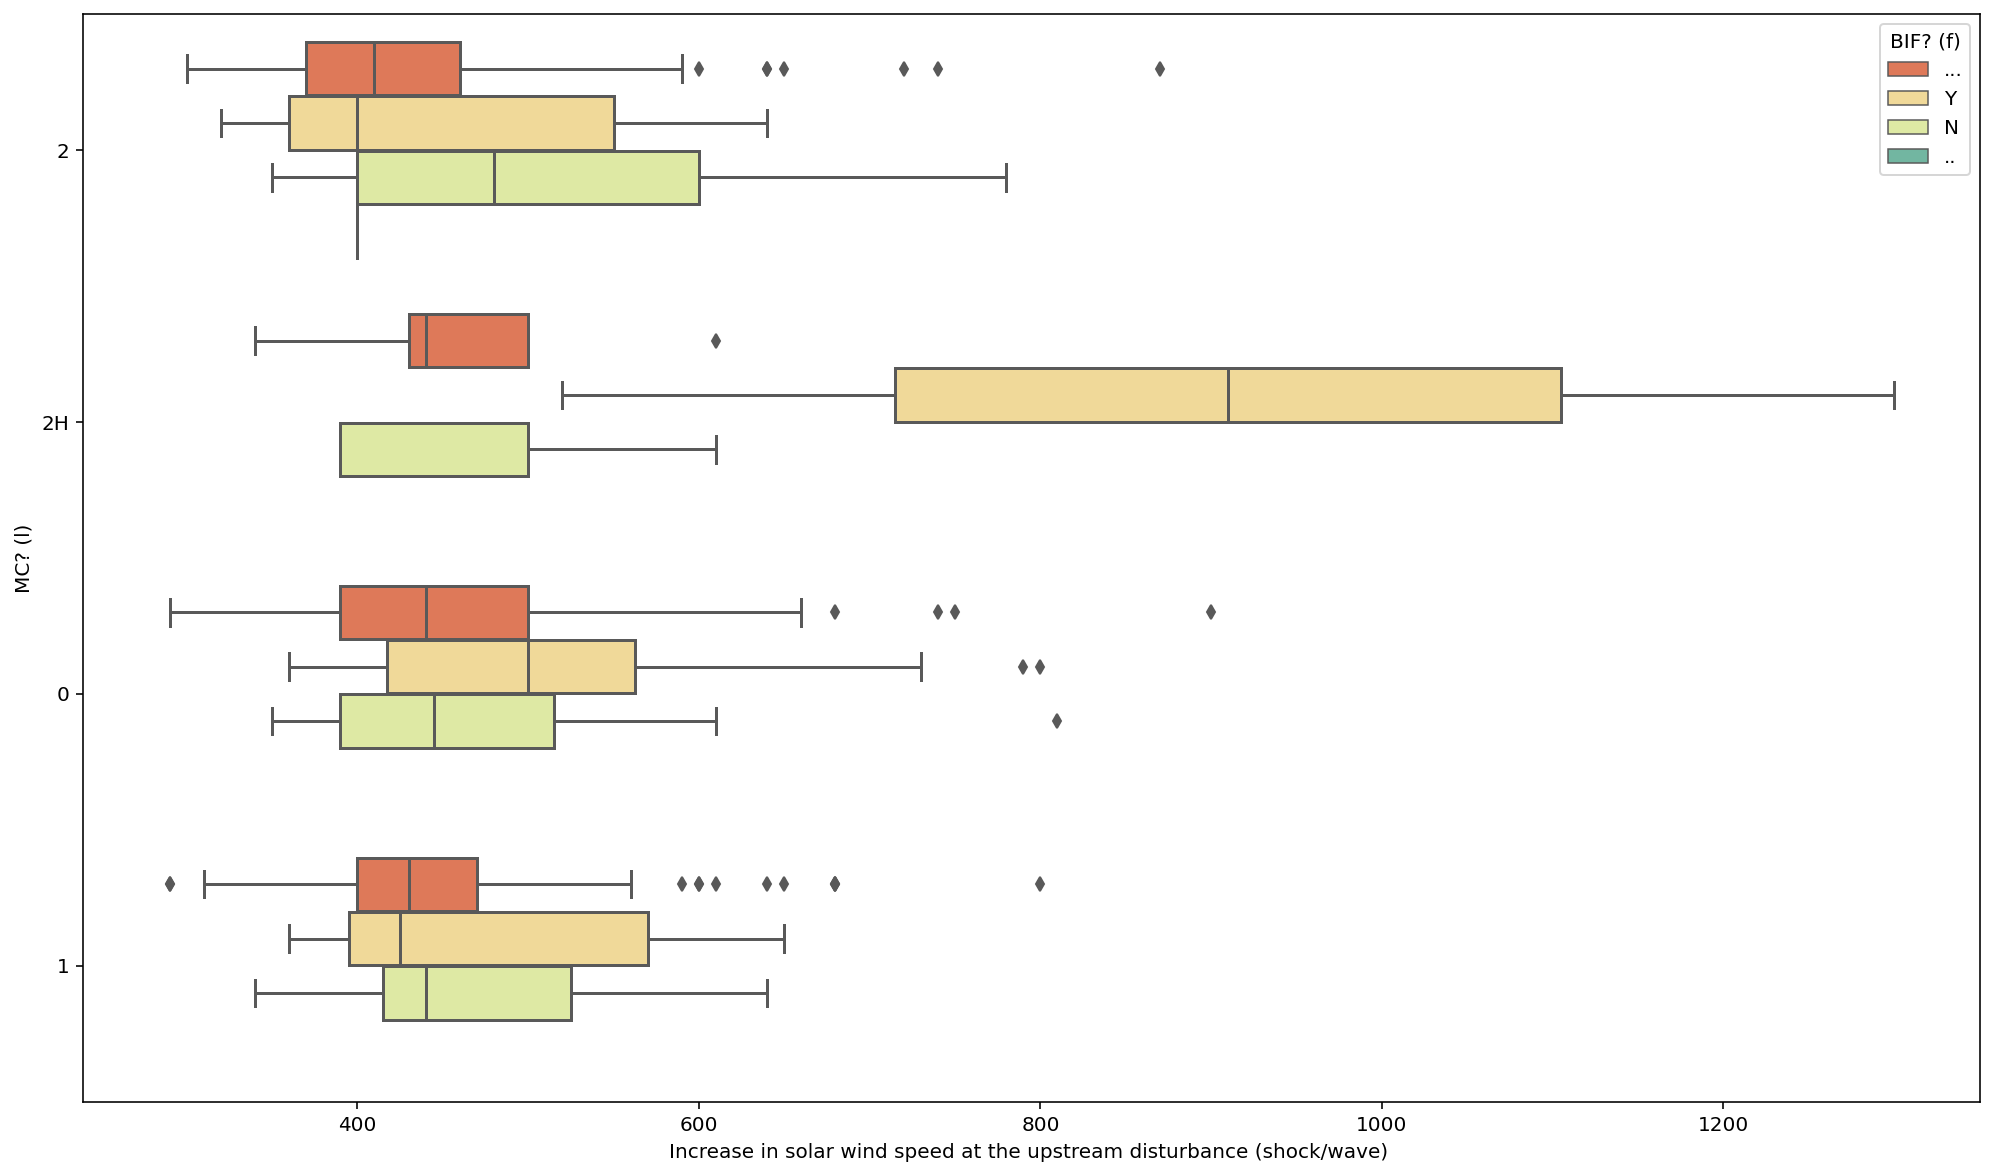

In [30]:
# https://www.reneshbedre.com/blog/anova.html
plt.figure(figsize=(17,10))

ax = sns.boxplot(y=df['MC? (l)'], 
                 x=df['V_ICME (km/s) (i)'], 
                 data=df, 
                 palette="Spectral", 
                 hue=df['BIF? (f)'])
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

# ax = sns.swarmplot(x=col1, y=col2_numer, data=df, color='#7d0013')
plt.xlabel('Increase in solar wind speed at the upstream disturbance (shock/wave) ')
plt.show()

In [27]:
df['B (nT) (k)'].unique()

array([ 9, 11,  7, 10, 14,  8, 20, 12, 21, 16, 17,  5,  6, 13, 18, 15,  4,
        3, 33, 22, 23, 19, 32, 28,  2])

In [33]:
# # https://www.reneshbedre.com/blog/anova.html
# plt.figure(figsize=(17,10))

# ax = sns.boxplot(y=df['MC? (l)'], 
#                  x=df['V_ICME (km/s) (i)'], 
#                  data=df, 
#                  palette="Spectral", 
#                  hue=df['B (nT) (k)'])
# # ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

# # ax = sns.swarmplot(x=col1, y=col2_numer, data=df, color='#7d0013')
# plt.xlabel('Increase in solar wind speed at the upstream disturbance (shock/wave) ')
# plt.show()

In [62]:
df['MC? (l)'].unique()

array(['2', '2H', '0', '1'], dtype=object)

In [92]:
df['Qual. (g)'].unique()

array(['2', '3', '1', '2W', '3W'], dtype=object)

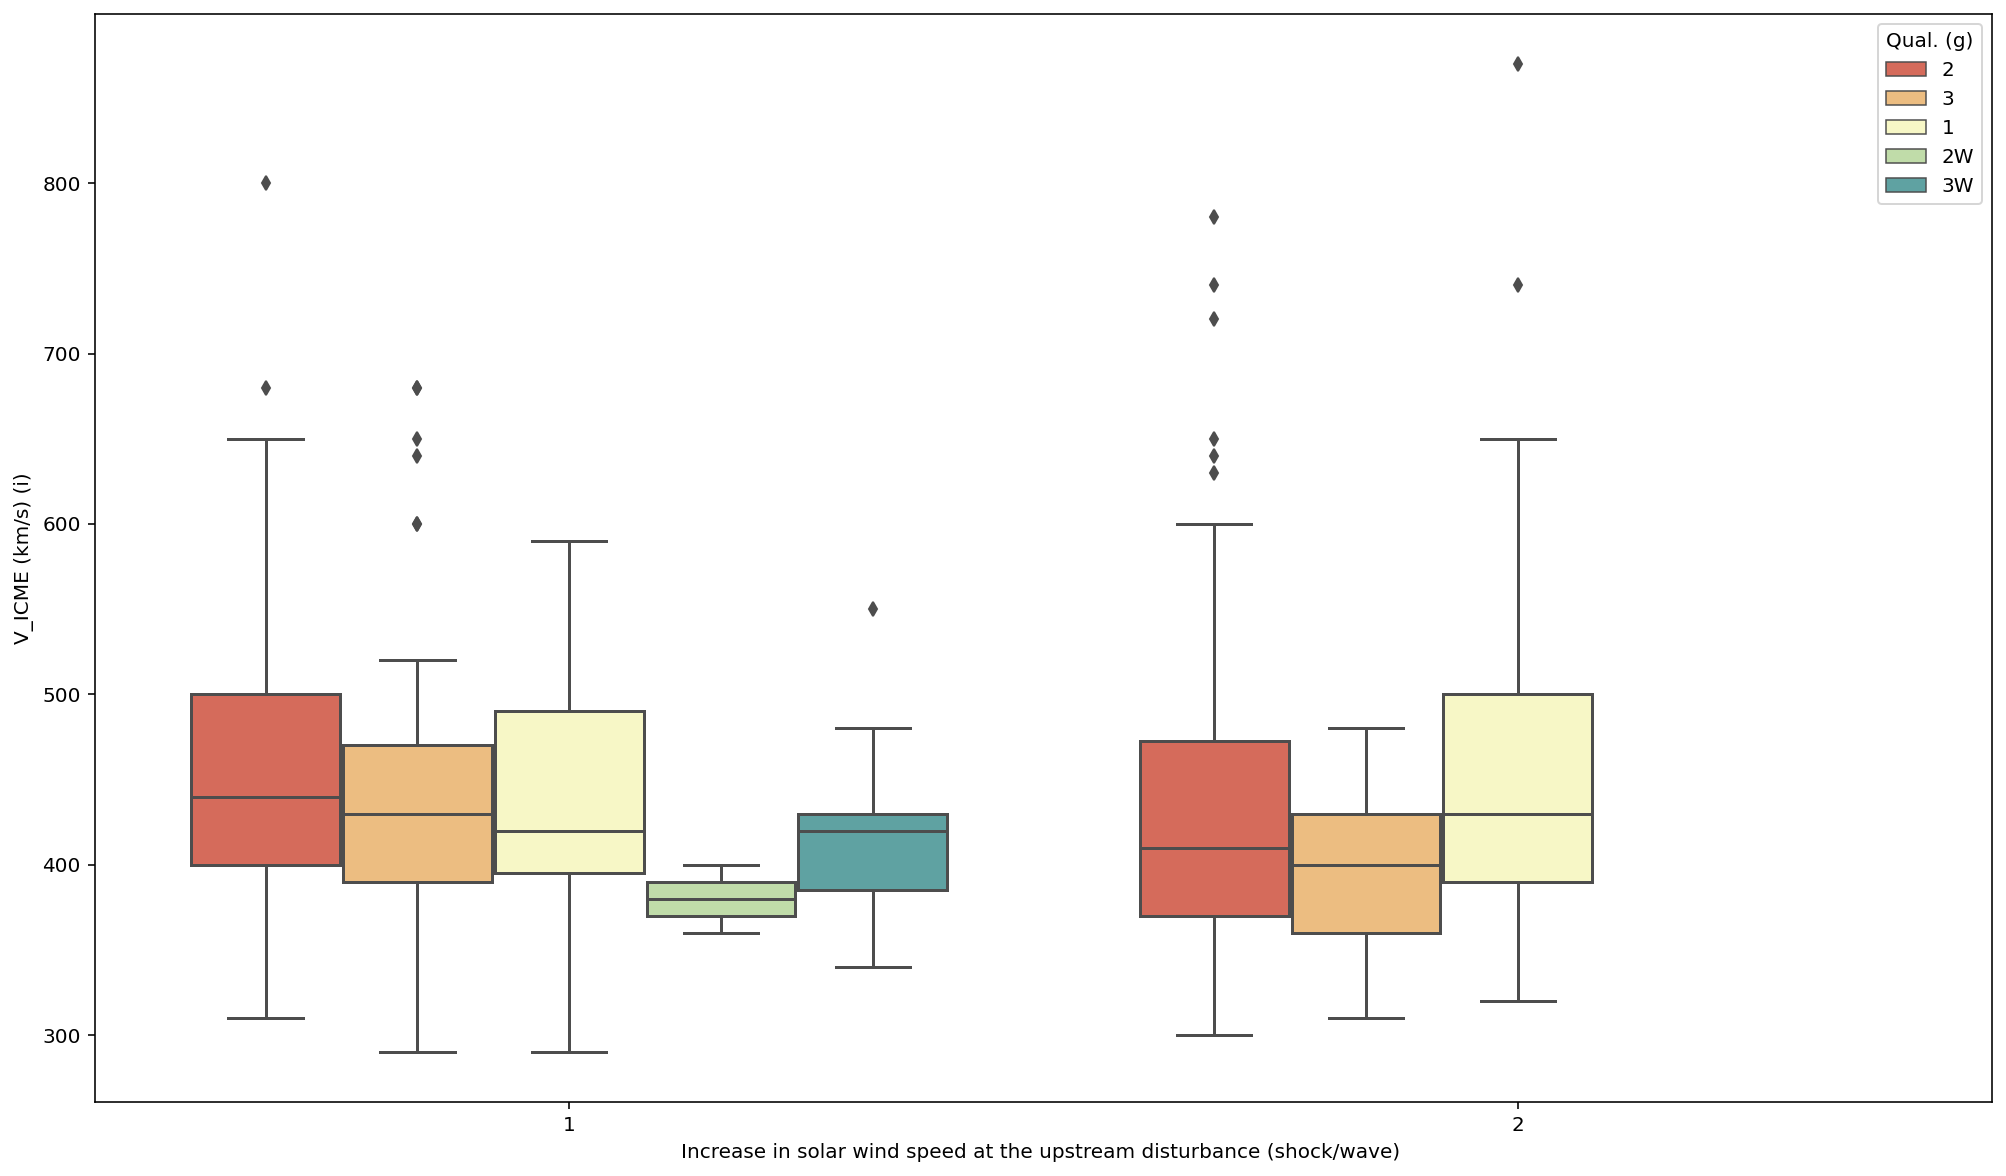

In [122]:
# https://www.reneshbedre.com/blog/anova.html
plt.figure(figsize=(17,10))

ax = sns.boxplot(x=df['MC? (l)'][(df['MC? (l)'] == '2') | (df['MC? (l)'] == '1')],
                 
                 y=df['V_ICME (km/s) (i)'], 
                 
                 data=df, 
                 
                 palette="Spectral", 
                 
                 hue=df['Qual. (g)'],
                 
#                  hue=df['Qual. (g)'][(df['Qual. (g)'] == '2') | (df['Qual. (g)'] == '1')],
                )
plt.xlabel('Increase in solar wind speed at the upstream disturbance (shock/wave) ')
plt.show()

In [123]:
df.head()

,Disturbance Y/M/D (UT) (a),Comp. Start (Hrs wrt. Plasma/ Field) (c),Comp. End (Hrs wrt. Plasma/ Field) (c),MC Start (Hrs wrt. Plasma/ Field) (d),End (Hrs wrt. Plasma/ Field) (d),BDE? (e),BIF? (f),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),V_transit (km/s) (n),LASCO CME Y/M/D (UT) (o),forward fast shock happens,new_col
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,,,,,,,,,
1996-05-27 15:00:00,1996/05/27 1500,...,...,0,+4,N,...,2,0,370,400,9,2,-33,...,NaN,No,NaN
1996-07-01 18:00:00,1996/07/01 1320,...,...,0,0,N,...,3,40,360,370,11,2,-20,...,NaN,No,NaN
1996-08-07 12:00:00,1996/08/07 0600,...,...,0,0,N,...,2,10,350,380,7,2,-23,...,NaN,No,NaN
1996-12-23 17:00:00,1996/12/23 1600,...,...,+10,0,N,...,2,20,360,420,10,2,-18,435,1996/12/19 1630 H,No,NaN
1997-01-10 04:00:00,1997/01/10 0104,...,...,0,0,Y,...,1,100 S,450,460,14,2,-78,507,1997/01/06 1510 H,Yes,NaN


In [125]:
df = df.drop(columns=['Comp. Start (Hrs wrt. Plasma/ Field) (c)'])
df = df.drop(columns=['Comp. End (Hrs wrt. Plasma/ Field) (c)'])

In [127]:
df = df.drop(columns=['Disturbance Y/M/D (UT) (a)'])

In [128]:
df.head()

,MC Start (Hrs wrt. Plasma/ Field) (d),End (Hrs wrt. Plasma/ Field) (d),BDE? (e),BIF? (f),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),V_transit (km/s) (n),LASCO CME Y/M/D (UT) (o),forward fast shock happens,new_col
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,,,,,,
1996-05-27 15:00:00,0,+4,N,...,2,0,370,400,9,2,-33,...,NaN,No,NaN
1996-07-01 18:00:00,0,0,N,...,3,40,360,370,11,2,-20,...,NaN,No,NaN
1996-08-07 12:00:00,0,0,N,...,2,10,350,380,7,2,-23,...,NaN,No,NaN
1996-12-23 17:00:00,+10,0,N,...,2,20,360,420,10,2,-18,435,1996/12/19 1630 H,No,NaN
1997-01-10 04:00:00,0,0,Y,...,1,100 S,450,460,14,2,-78,507,1997/01/06 1510 H,Yes,NaN


In [130]:
cols = ['new_col', 'MC Start (Hrs wrt. Plasma/ Field) (d)', 
        'End (Hrs wrt. Plasma/ Field) (d)']
df = df.drop(columns=cols)


In [131]:
df.head()

,BDE? (e),BIF? (f),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),V_transit (km/s) (n),LASCO CME Y/M/D (UT) (o),forward fast shock happens
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,,,
1996-05-27 15:00:00,N,...,2,0,370,400,9,2,-33,...,NaN,No
1996-07-01 18:00:00,N,...,3,40,360,370,11,2,-20,...,NaN,No
1996-08-07 12:00:00,N,...,2,10,350,380,7,2,-23,...,NaN,No
1996-12-23 17:00:00,N,...,2,20,360,420,10,2,-18,435,1996/12/19 1630 H,No
1997-01-10 04:00:00,Y,...,1,100 S,450,460,14,2,-78,507,1997/01/06 1510 H,Yes


In [132]:
df = df.drop(columns=['BIF? (f)'])

In [133]:
df.head()

,BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),V_transit (km/s) (n),LASCO CME Y/M/D (UT) (o),forward fast shock happens
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,,
1996-05-27 15:00:00,N,2,0,370,400,9,2,-33,...,NaN,No
1996-07-01 18:00:00,N,3,40,360,370,11,2,-20,...,NaN,No
1996-08-07 12:00:00,N,2,10,350,380,7,2,-23,...,NaN,No
1996-12-23 17:00:00,N,2,20,360,420,10,2,-18,435,1996/12/19 1630 H,No
1997-01-10 04:00:00,Y,1,100 S,450,460,14,2,-78,507,1997/01/06 1510 H,Yes


In [135]:
df = df.drop(columns=['LASCO CME Y/M/D (UT) (o)'])

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 513 entries, 1996-05-27 15:00:00 to 2021-05-26 22:00:00
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   BDE? (e)                    513 non-null    object
 1   Qual. (g)                   513 non-null    object
 2   dV (km/s) (h)               513 non-null    object
 3   V_ICME (km/s) (i)           513 non-null    int64 
 4   V_max (km/s) (j)            513 non-null    int64 
 5   B (nT) (k)                  513 non-null    int64 
 6   MC? (l)                     513 non-null    object
 7   Dst (nT) (m)                513 non-null    object
 8   V_transit (km/s) (n)        512 non-null    object
 9   forward fast shock happens  513 non-null    object
dtypes: int64(3), object(7)
memory usage: 64.1+ KB


In [137]:
df.head()

,BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),V_transit (km/s) (n),forward fast shock happens
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,
1996-05-27 15:00:00,N,2,0,370,400,9,2,-33,...,No
1996-07-01 18:00:00,N,3,40,360,370,11,2,-20,...,No
1996-08-07 12:00:00,N,2,10,350,380,7,2,-23,...,No
1996-12-23 17:00:00,N,2,20,360,420,10,2,-18,435,No
1997-01-10 04:00:00,Y,1,100 S,450,460,14,2,-78,507,Yes


In [138]:
# magnetic cloud has been reported
df = df.rename(columns = {'MC? (l)':'magnetic cloud has been reported'})

In [140]:
df = df.drop(columns=['V_max (km/s) (j)'])

In [141]:
df.head()

,BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),B (nT) (k),magnetic cloud has been reported,Dst (nT) (m),V_transit (km/s) (n),forward fast shock happens
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,
1996-05-27 15:00:00,N,2,0,370,9,2,-33,...,No
1996-07-01 18:00:00,N,3,40,360,11,2,-20,...,No
1996-08-07 12:00:00,N,2,10,350,7,2,-23,...,No
1996-12-23 17:00:00,N,2,20,360,10,2,-18,435,No
1997-01-10 04:00:00,Y,1,100 S,450,14,2,-78,507,Yes


In [142]:
# Evidence of BiDirectional suprathermal Electron strahls (BDE)
df = df.rename(columns = {'BDE? (e)':'Evidence of BiDirectional suprathermal Electron strahls (BDE)',
                         'Qual. (g)':'"quality" of the boundary times',
                         'dV (km/s) (h)':'Increase in solar wind speed at the upstream disturbance (shock/wave)',
                         'V_ICME (km/s) (i)':'solar wind speed km/s',
                         'B (nT) (k)':'Mean magnetic field strength in the ICME',
                         'Dst (nT) (m)':'minimum value of the geomagnetic',
                         'V_transit (km/s) (n)':'Mean 1 AU transit speed of the disturbance'})


In [143]:
df.head()

,Evidence of BiDirectional suprathermal Electron strahls (BDE),"""quality"" of the boundary times",Increase in solar wind speed at the upstream disturbance (shock/wave),solar wind speed km/s,Mean magnetic field strength in the ICME,magnetic cloud has been reported,minimum value of the geomagnetic,Mean 1 AU transit speed of the disturbance,forward fast shock happens
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,
1996-05-27 15:00:00,N,2,0,370,9,2,-33,...,No
1996-07-01 18:00:00,N,3,40,360,11,2,-20,...,No
1996-08-07 12:00:00,N,2,10,350,7,2,-23,...,No
1996-12-23 17:00:00,N,2,20,360,10,2,-18,435,No
1997-01-10 04:00:00,Y,1,100 S,450,14,2,-78,507,Yes


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 513 entries, 1996-05-27 15:00:00 to 2021-05-26 22:00:00
Data columns (total 9 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Evidence of BiDirectional suprathermal Electron strahls (BDE)          513 non-null    object
 1   "quality" of the boundary times                                        513 non-null    object
 2   Increase in solar wind speed at the upstream disturbance (shock/wave)  513 non-null    object
 3   solar wind speed km/s                                                  513 non-null    int64 
 4   Mean magnetic field strength in the ICME                               513 non-null    int64 
 5   magnetic cloud has been reported                                       513 non-null    object
 6   minimum value of the geomagnetic                              

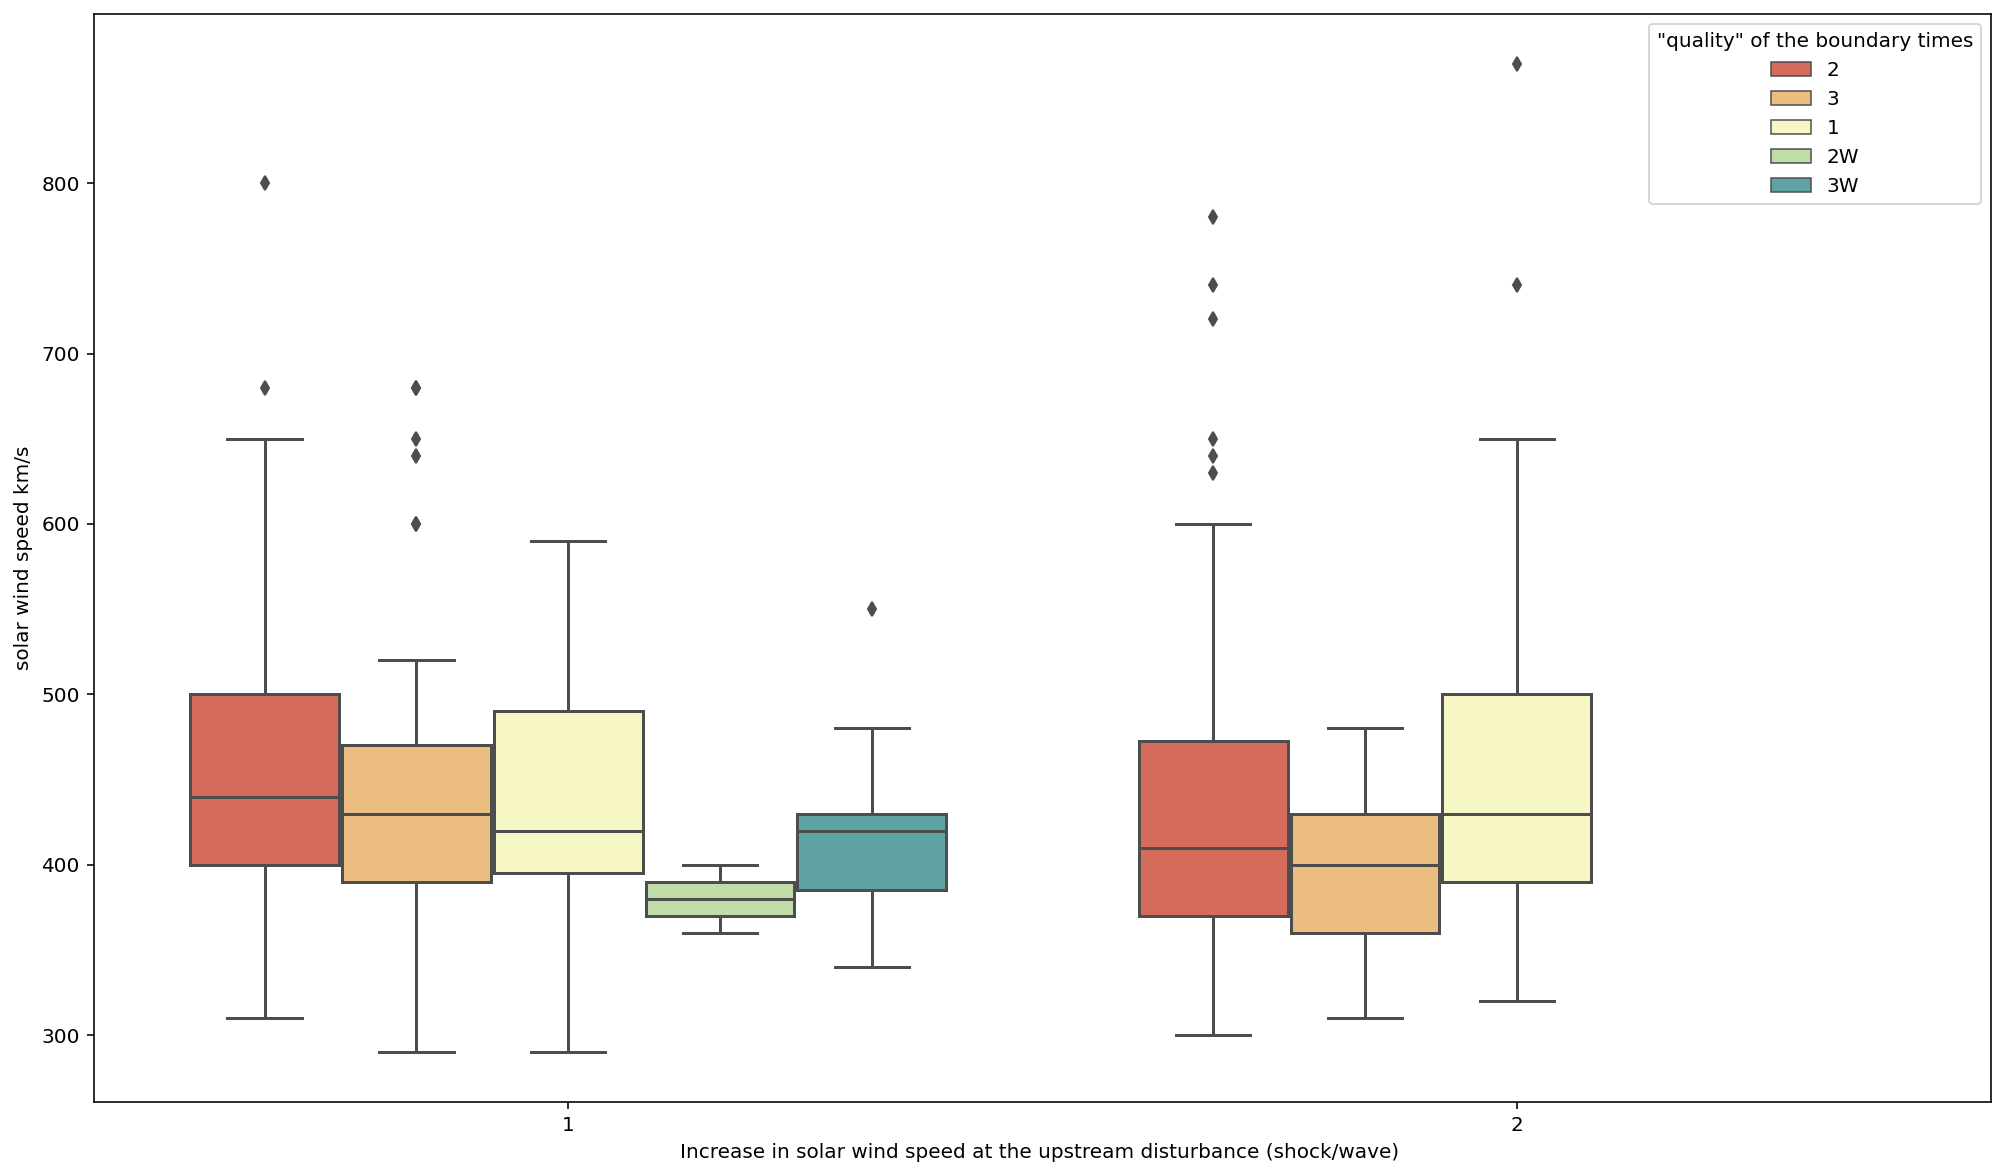

In [148]:
# https://www.reneshbedre.com/blog/anova.html
plt.figure(figsize=(17,10))

ax = sns.boxplot(x=df['magnetic cloud has been reported'][(df['magnetic cloud has been reported'] == '2') | (df['magnetic cloud has been reported'] == '1')],
                 
                 y=df['solar wind speed km/s'], 
                 
                 data=df, 
                 
                 palette="Spectral", 
                 
                 hue=df['"quality" of the boundary times'],                 
                )
plt.xlabel('Increase in solar wind speed at the upstream disturbance (shock/wave) ')
plt.show()